In [1]:
#패키지 불러오기
import pandas as pd # 데이터 처리
import numpy as np #연산
import matplotlib #시각화
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import copy
from sklearn.model_selection import train_test_split # 데이터 분할 : train, test
from statsmodels.formula.api import ols # 회귀분석
from statsmodels.api import qqplot, add_constant #회귀분석 상수항 추가
import statsmodels.formula.api as smf # 회귀분석
from sklearn.tree import DecisionTreeRegressor # 예측/회귀 Decision Tree
from sklearn.ensemble import RandomForestRegressor #예측/회귀
from sklearn.ensemble import GradientBoostingRegressor #예측/회귀
from sklearn.linear_model import LinearRegression #분산 팽창계수 계산할때 사용
from sklearn.feature_selection import RFE #후진제거법(변수선택)
from sklearn.preprocessing import StandardScaler #표준화 회귀계수 산출(scale 변환)
from statsmodels.tools.eval_measures import rmse # 평가함수
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn import tree

from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.outliers_influence import variance_inflation_factor #다중공산성 확인
import math

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


import graphviz # 나무구조 시각화
from sklearn.tree import export_graphviz

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import datetime

#로지스틱 회귀
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
# scaling
from sklearn.preprocessing import StandardScaler
# 분류 SVM
from sklearn.svm import SVC
# 분류 NN (MLPClassifier)
from sklearn.neural_network import MLPClassifier
# 분류 KNN
from sklearn.neighbors import KNeighborsClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')
import matplotlib.font_manager as fm

# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
#import pyreadr
import seaborn as sns
import multiprocessing as mp
from glob import glob
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import VarianceThreshold
# 메트릭 라이브러리
from sklearn.metrics import accuracy_score, plot_roc_curve, precision_score, recall_score

# 한글을 지원하는 폰트로 변경
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우는 'Malgun Gothic'으로 변경 요망

# plot style을 ggplot으로 변경
plt.style.use('ggplot')

# 모든 것을 출력하는 옵션
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

def make_line(df, tagname):
    df = df[(df['id'] == tagname) & (df['cause'] != '기타중지')]
    df = df.sort_values('datetime').reset_index()
    
    plt.figure(figsize=(10,8))
    sns.lineplot(x='index',y='value',hue='cause',data=df)

In [2]:
df_raw = pd.read_csv('오대오.csv')
#df_raw_3['datetime'] = pd.to_datetime(df_raw_3.datetime).dt.tz_localize(None)
#df_raw_3 = pd.pivot_table(df_raw_3, index ='datetime', columns = 'id', values ='value')
#df_raw_3.head()

In [3]:
df_raw = df_raw.drop('Unnamed: 0',axis=1)

In [4]:
df_raw

,TAG_001,TAG_002,TAG_004,TAG_005,TAG_006,TAG_007,TAG_008,TAG_011,TAG_012,TAG_013,...,TAG_185,TAG_186,TAG_187,TAG_188,TAG_189,TAG_190,TAG_191,TAG_192,TAG_193,cause
0,14.516590,3.727272,3.659474,64.386761,0.000000,10.879403,0.0,100.0,91.126781,43.569761,...,40.107615,39.866318,39.867307,39.242749,0.045077,0.338026,0.199523,0.003820,46.439539,0
1,14.438721,3.863102,3.823411,0.370337,0.000000,0.019885,0.0,100.0,92.520378,52.853971,...,40.061705,29.150599,0.000000,39.549413,0.060481,0.313373,0.098486,0.035789,94.234855,0
2,14.369410,3.819573,3.849695,122.368513,27.823089,0.096102,0.0,100.0,92.611488,51.192340,...,39.910447,40.206674,40.657971,40.766664,0.489483,0.178890,0.051197,0.035789,64.669526,0
3,14.080565,3.913643,3.882729,227.436914,0.000000,35.740705,0.0,100.0,90.915691,48.961057,...,33.887585,40.356547,39.592079,40.202029,0.264244,0.228764,0.009547,0.029205,48.615663,0
4,14.344228,3.676193,3.674700,76.245618,0.000000,12.329847,0.0,100.0,92.037182,48.874683,...,40.347095,40.627034,39.046095,39.954925,0.193447,0.410250,0.027081,0.087180,49.166320,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109435,14.664333,3.582974,3.536546,67.188139,0.000000,0.000000,0.0,100.0,91.572893,49.440436,...,38.212043,35.510047,38.788630,40.738352,0.121573,0.195366,0.021214,0.097006,47.532919,1
109436,14.252853,3.924505,3.894912,165.684886,5.189121,0.000000,0.0,100.0,91.273919,49.740476,...,39.948361,41.142189,40.687020,39.954327,0.061273,0.201190,0.121320,0.077722,34.597847,1
109437,14.730582,3.548382,3.516528,27.604100,2.630102,0.000000,0.0,100.0,91.385959,50.079478,...,39.606370,40.273973,40.311136,36.640596,0.345311,0.277868,0.044777,0.000000,78.200642,1
109438,14.223682,3.595405,3.693201,210.320778,0.000000,37.981309,0.0,100.0,90.416878,51.816844,...,2.718306,40.355379,14.064412,40.099579,0.136705,0.257537,0.004777,0.041058,30.884150,1


In [7]:
df = df_raw

In [5]:
# 모델 빌드전 결측치 최종 확인
df_raw.isna().sum()

TAG_001    0
TAG_002    0
TAG_004    0
TAG_005    0
TAG_006    0
          ..
TAG_190    0
TAG_191    0
TAG_192    0
TAG_193    0
cause      0
Length: 140, dtype: int64

In [38]:
# split data
train_data, test_data = train_test_split(df, train_size = 0.6, stratify = df['cause'], random_state = 2022)
print(train_data.shape)
print(test_data.shape)

(65664, 140)
(43776, 140)


# down sampling
train_data = train_data.sample(frac = 0.01)
test_data  = test_data.sample(frac = 0.01)

In [39]:
# 독립변수, 종속변수 정의
my_y = 'cause'
my_x = train_data.drop('cause', axis = 1).columns

In [40]:
# 모델 Import
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier
# from xgboost import XGBClassifier

In [41]:
# 앙상블 모델 정의 : 개별 모델은 교재에서 배운대로 작성하면 되므로 생략함
ensemble = [
    ('glm', LogisticRegression(random_state = 1234)),
    ('gbm', GradientBoostingClassifier(n_estimators = 100, random_state = 1234)),
    ('drf', RandomForestClassifier(n_estimators = 100, random_state = 1234)),
    ('hdl', MLPClassifier(random_state = 1234)) ]

In [42]:
# 스택킹 앙상블
mds = StackingClassifier(estimators = ensemble, n_jobs = -1)

In [44]:
# 모델 학습
md_trained = mds.fit(train_data[my_x], train_data[my_y])

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

In [45]:
# 분류 값 예측
y_pred = md_trained.predict(test_data[my_x])

In [46]:
# 메트릭 라이브러리
from sklearn.metrics import accuracy_score, plot_roc_curve, precision_score, recall_score

In [47]:
# 테스트 데이터에 대한 정확도 확인
print('accuracy_score :',round(accuracy_score(test_data[my_y], y_pred) * 100, 2))

accuracy_score : 99.65


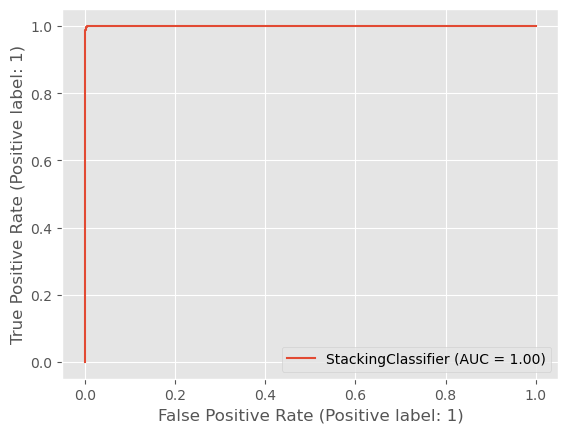

In [48]:
# ROC 그래프 보기
plot_roc_curve(md_trained,test_data[my_x],test_data[my_y])

In [49]:
# 정밀도와 재현율 확인 (시간 절약을 위하여 다운 샘플링함으로써 모형의 성능은 높지 않음)
print('precision_score :',round(precision_score(test_data[my_y], y_pred) * 100, 2))
print('recall_score :',round(recall_score(test_data[my_y], y_pred) * 100, 2))

precision_score : 99.48
recall_score : 99.82


In [50]:
from sklearn.metrics import confusion_matrix
print('confusion matrix :',confusion_matrix(test_data[my_y], y_pred))

confusion matrix : [[21773   115]
 [   39 21849]]


In [51]:
from sklearn.metrics import classification_report
print('classification :',classification_report(test_data[my_y], y_pred,digits=3))

classification :               precision    recall  f1-score   support

           0      0.998     0.995     0.996     21888
           1      0.995     0.998     0.996     21888

    accuracy                          0.996     43776
   macro avg      0.996     0.996     0.996     43776
weighted avg      0.996     0.996     0.996     43776



print('classification :',classification_report(test_data[my_y], y_pred,digits=5))